Observe the effect of synaptic timescale on spike time

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import math

In [ ]:
from google.colab import files

data_upload = files.upload()

for file_name in data_upload.keys():
  print(f"{file_name} has been uploaded, with length {len(data_upload[file_name])}")

Saving functions_sim.py to functions_sim.py
Saving neuron_layer.py to neuron_layer.py
Saving neuron_network.py to neuron_network.py
functions_sim.py has been uploaded, with length 8710
neuron_layer.py has been uploaded, with length 13019
neuron_network.py has been uploaded, with length 4425


In [ ]:
from neuron_layer import NeuronLayerX
from neuron_network import NeuronNetwork
from functions_sim import *

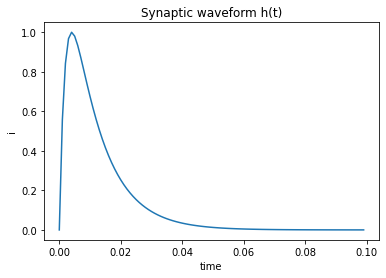

In [ ]:
dt = 1e-3
tau1 = 10e-3 # in ms
tau2 = 2e-3
duration = 10*max(tau1, tau2) # 10 times the longest time constant
t = np.arange(0, duration, dt)
synaptic_waveform = np.exp(-t/tau1)-np.exp(-t/tau2)
synaptic_waveform = synaptic_waveform/np.amax(synaptic_waveform)
plt.plot(t, synaptic_waveform)
plt.xlabel("time")
plt.ylabel("i")
plt.title("Synaptic waveform h(t)")
plt.show()

In [ ]:
tau_all = np.arange(1e-3, 6e-3, 1e-3)
print(tau_all)

[0.001 0.002 0.003 0.004 0.005]


In [ ]:
def get_synaptic_waveform(tau1, tau2):
    dt = 1e-3
    duration = 10*max(tau1, tau2) # 10 times the longest time constant
    t = np.arange(0, duration, dt)
    synaptic_waveform = np.exp(-t/tau1)-np.exp(-t/tau2)
    synaptic_waveform = synaptic_waveform/np.amax(synaptic_waveform)
    return synaptic_waveform


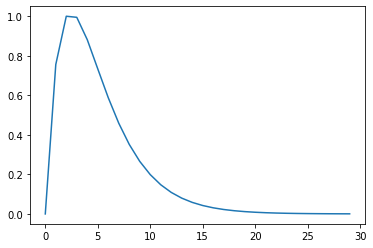

In [ ]:
h = get_synaptic_waveform(tau_all[2], tau_all[1])
plt.plot(h)

In [ ]:
tau_all = np.arange(2e-3, 22e-3, 4e-3)
print(tau_all)

[0.002 0.006 0.01  0.014 0.018]


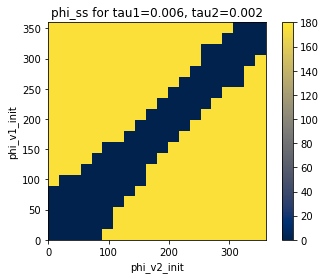

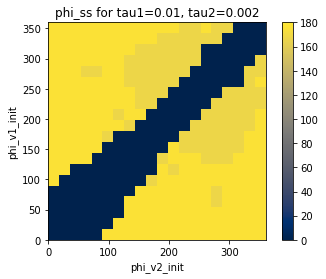

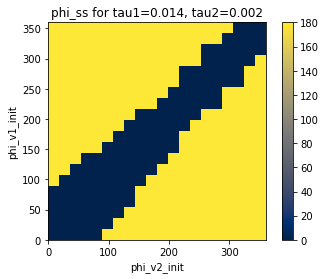

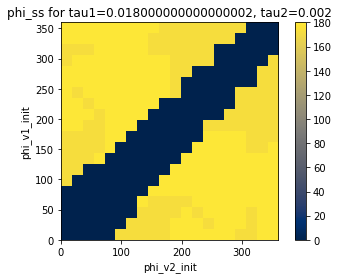

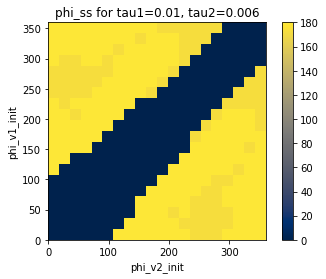

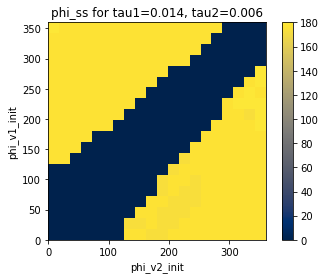

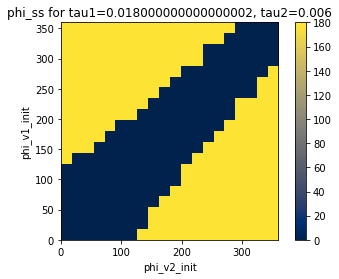

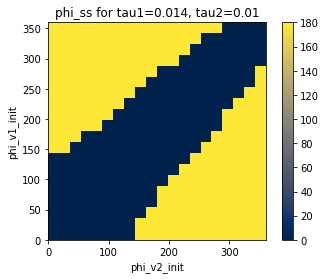

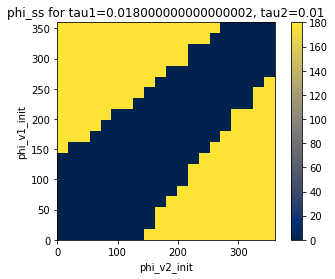

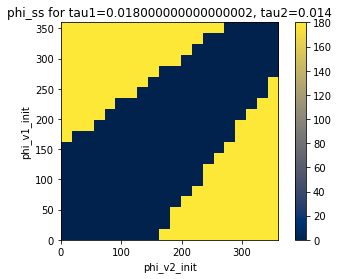

In [ ]:
for i in range(len(tau_all)-1):
  for j in range(i+1,len(tau_all)):
    tau1 = tau_all[j]
    tau2 = tau_all[i]
    syn_wav = get_synaptic_waveform(tau1, tau2)
    n_v = 20
    v_values = np.linspace(0, 1, n_v)
    w_cross = -0.5
    w_self = -0.5
    i_ext_mag = 1.5
    plt_ttl = "phi_ss for tau1="+ str(tau1) +", tau2="+ str(tau2)
    phi_all = v_init_sweep(v_values, w_cross, w_self, i_ext_mag, syn_wav)
    plot_phase(phi_all, [0, 360, 0, 360], 'phi_v2_init', 'phi_v1_init', plt_ttl)


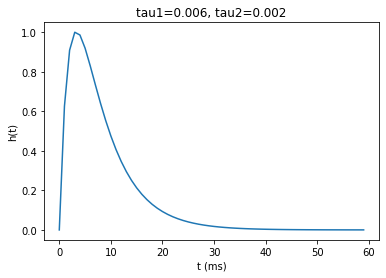

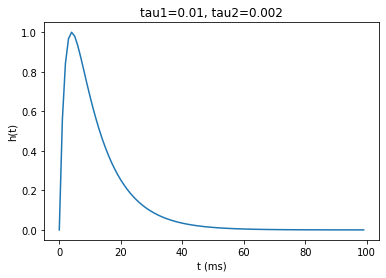

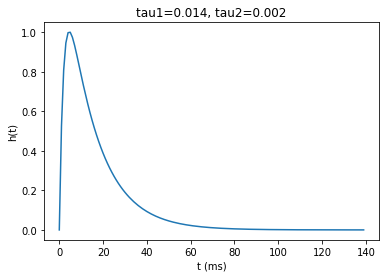

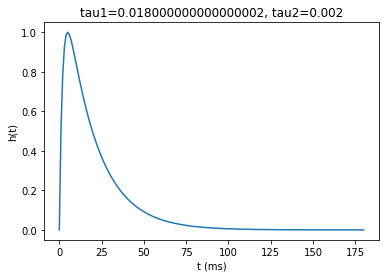

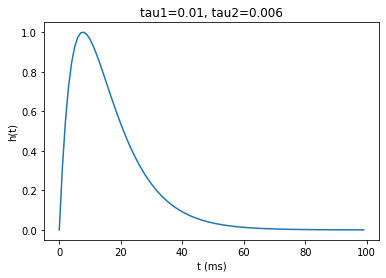

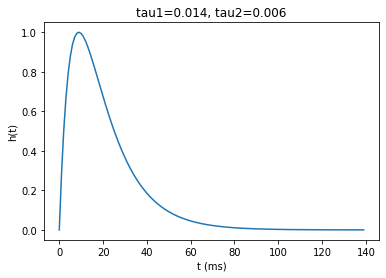

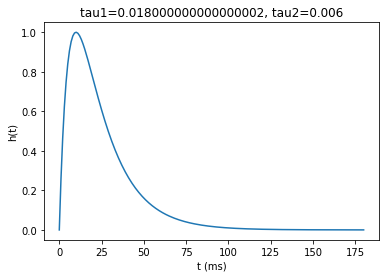

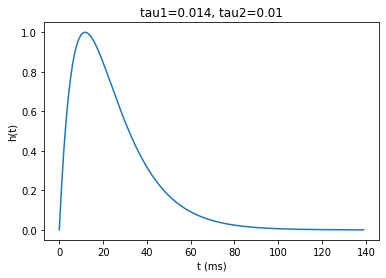

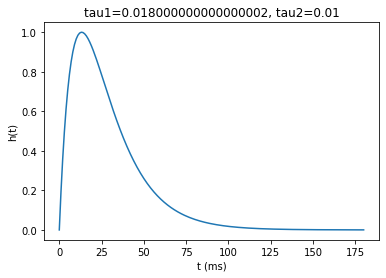

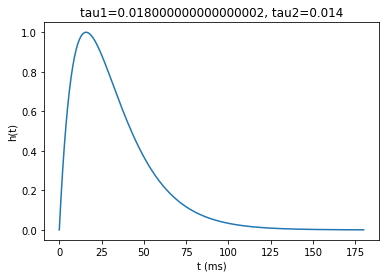

In [ ]:
for i in range(len(tau_all)-1):
  for j in range(i+1,len(tau_all)):
    tau1 = tau_all[j]
    tau2 = tau_all[i]
    syn_wav = get_synaptic_waveform(tau1, tau2)
    
    plt.plot(syn_wav)
    plt.title(f"tau1={tau1}, tau2={tau2}")
    plt.xlabel("t (ms)")
    plt.ylabel("h(t)")
    plt.show()



In [ ]:
tau_all2 = np.arange(18e-3, 40e-3, 4e-3)
print(tau_all2)

[0.018 0.022 0.026 0.03  0.034 0.038]


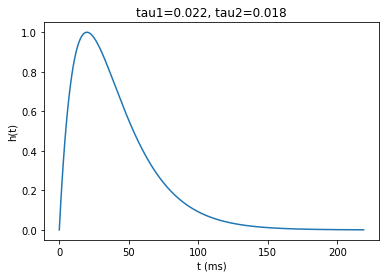

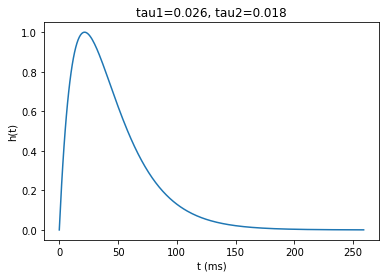

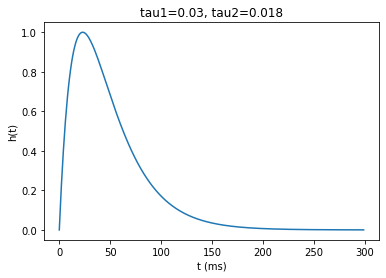

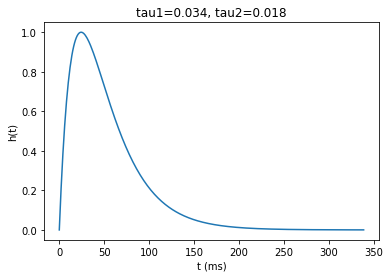

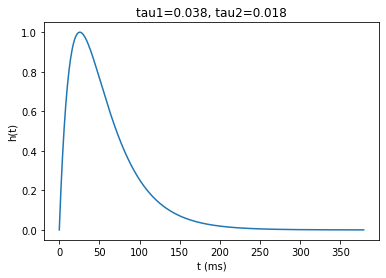

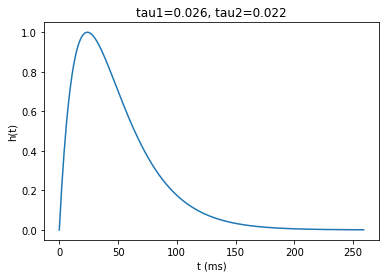

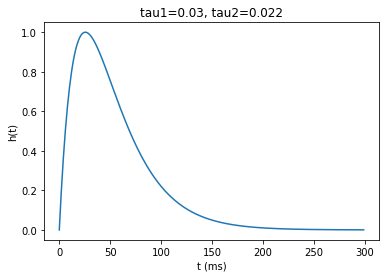

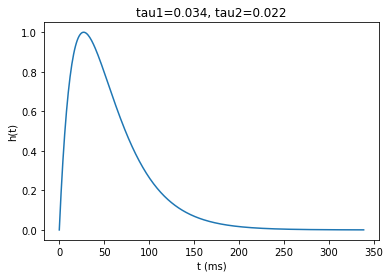

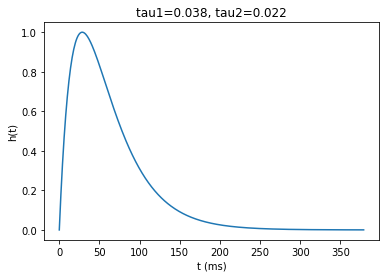

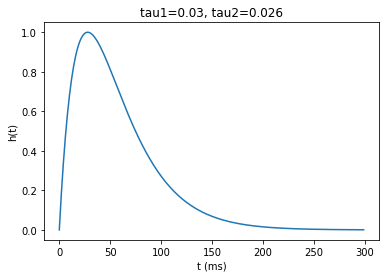

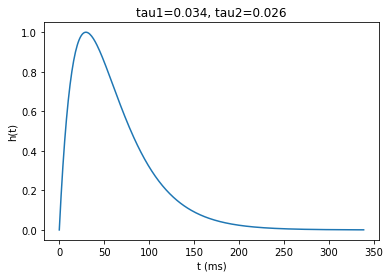

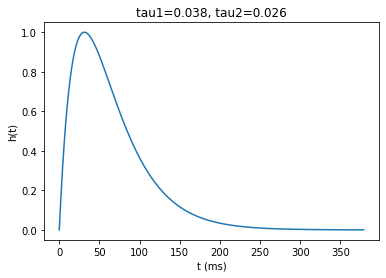

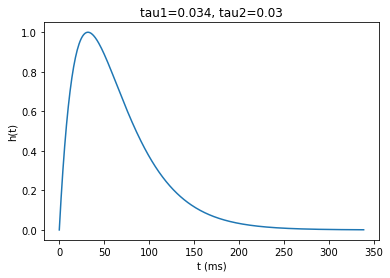

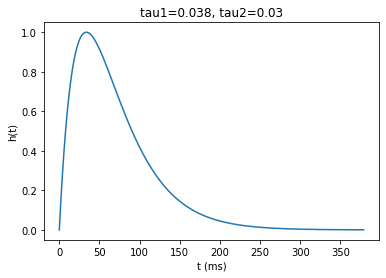

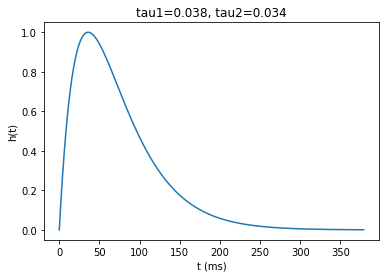

In [ ]:
for i in range(len(tau_all2)-1):
  for j in range(i+1,len(tau_all2)):
    tau1 = tau_all2[j]
    tau2 = tau_all2[i]
    syn_wav = get_synaptic_waveform(tau1, tau2)
    
    plt.plot(syn_wav)
    plt.title(f"tau1={tau1}, tau2={tau2}")
    plt.xlabel("t (ms)")
    plt.ylabel("h(t)")
    plt.show()



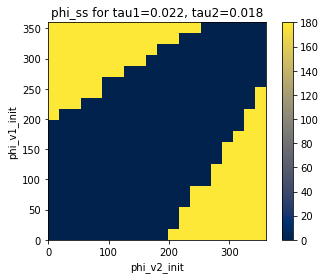

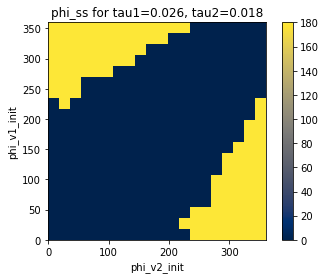

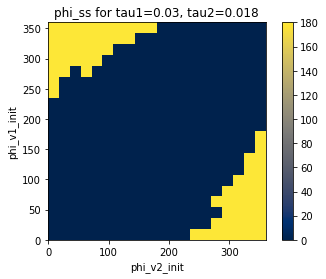

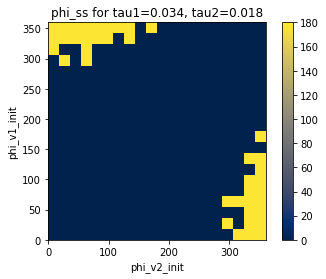

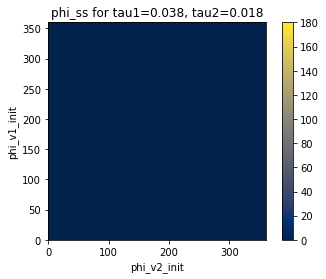

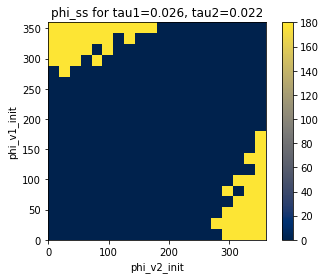

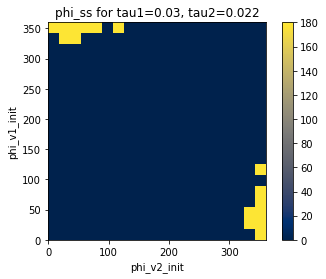

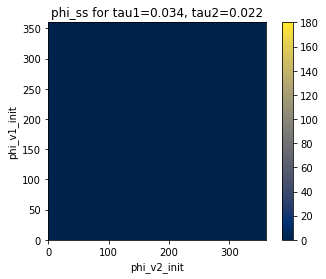

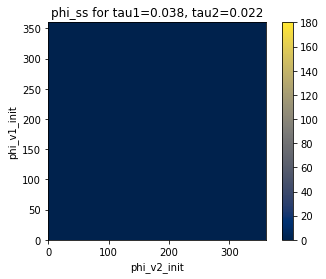

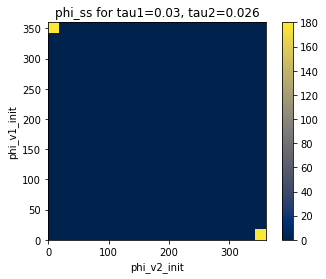

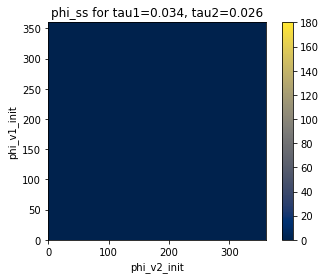

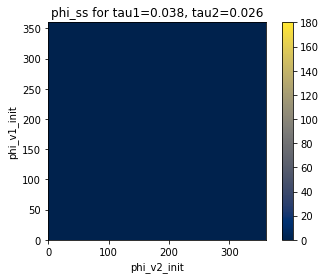

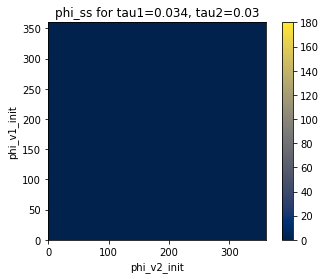

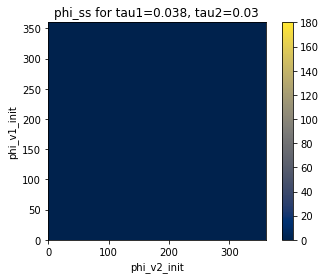

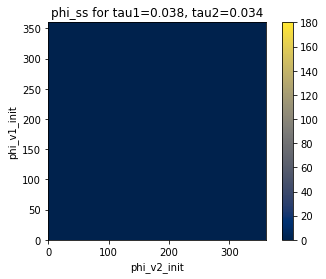

In [ ]:
for i in range(len(tau_all2)-1):
  for j in range(i+1,len(tau_all2)):
    tau1 = tau_all2[j]
    tau2 = tau_all2[i]
    syn_wav = get_synaptic_waveform(tau1, tau2)
    n_v = 20
    v_values = np.linspace(0, 1, n_v)
    w_cross = -0.5
    w_self = -0.5
    i_ext_mag = 1.5
    plt_ttl = "phi_ss for tau1="+ str(tau1) +", tau2="+ str(tau2)
    phi_all = v_init_sweep(v_values, w_cross, w_self, i_ext_mag, syn_wav)
    plot_phase(phi_all, [0, 360, 0, 360], 'phi_v2_init', 'phi_v1_init', plt_ttl)


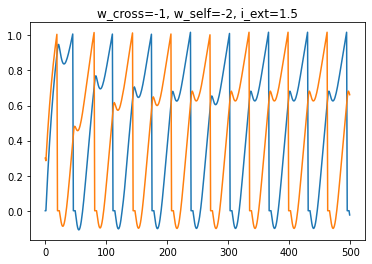

In [ ]:
i_ext = 1.5
N = 500
w_cross = -1
w_self = -2
outputs = run_simulation(w_cross, w_self, i_ext, synaptic_waveform,N, v_initial=np.array([0, 0.3]).reshape((2,1)))
v, s = outputs["voltage"], outputs["spike"]
plt.plot(v[:,0])
plt.plot(v[:,1])
plt.title(f"w_cross={w_cross}, w_self={w_self}, i_ext={i_ext}")
plt.show()

# Observe the effect of noise on settling phase

Noise has been added to the input bias current (at each time instant)

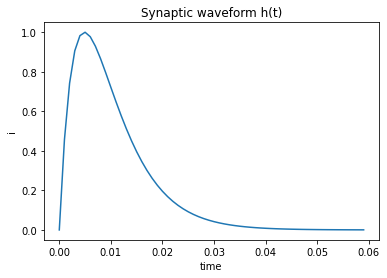

In [ ]:
dt = 1e-3
tau1 = 6e-3 # in ms
tau2 = 4e-3
duration = 10*max(tau1, tau2) # 10 times the longest time constant
t = np.arange(0, duration, dt)
h_syn = np.exp(-t/tau1)-np.exp(-t/tau2)
h_syn = h_syn/np.amax(h_syn)
plt.plot(t, h_syn)
plt.xlabel("time")
plt.ylabel("i")
plt.title("Synaptic waveform h(t)")
plt.show()

In [ ]:
w_cross = -0.6
w_self=-0.5
i_ext_mag = 1.5
N = 2000

In [ ]:
out = run_simulation_noisy(w_cross, w_self, i_ext_mag, h_syn, N,noise_var=0.1, v_initial=np.array([0, 0.3]).reshape((2,1)))

v, s, i_ext = out['voltage'], out['spike'], out['external_current'] 

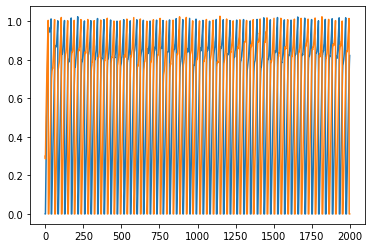

In [ ]:
plt.plot(v[:,0])
plt.plot(v[:,1])

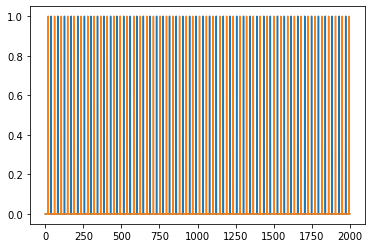

In [ ]:
plt.plot(s[:,0])
plt.plot(s[:,1])

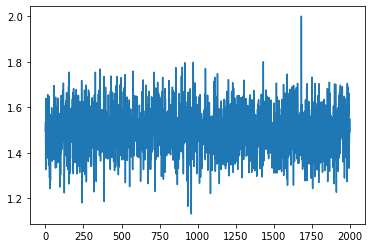

In [ ]:
plt.plot(i_ext[0,:])

In [ ]:
dph, ph1, ph2 = get_phase_t(s[:,0], s[:,1])

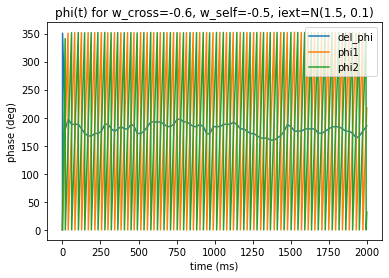

In [ ]:
plt.plot(dph)
plt.plot(ph1)
plt.plot(ph2)
plt.legend(["del_phi", "phi1", "phi2"])
plt.xlabel("time (ms)")
plt.ylabel("phase (deg)")
plt.title("phi(t) for w_cross="+str(w_cross)+", w_self="+str(w_self)+", iext=N(1.5, 0.1)")
plt.show()

In [ ]:
def v_init_sweep_noisy(v_values, w_cr, w_se, iext, syn_wav, noise_var, n_steps):
    n_neurons=2
    n_v = len(v_values)
    # v_values = np.linspace(0, 0.5, n_v)
    phi_all = np.zeros((n_v, n_v))
    for m in range(n_v):
        for k in range(n_v):
            v_init = np.array([v_values[m], v_values[k]]).reshape((2,1))
            outputs = run_simulation_noisy(w_cross=w_cr, w_self=w_se, i_ext_mag=iext,synaptic_waveform=syn_wav,noise_var=noise_var, num_steps=n_steps, num_neurons=n_neurons, v_initial=v_init)
            v,s = outputs['voltage'], outputs['spike']
            phi = settling_phase(s[:,0], s[:,1])
            phi_all[m,k] = phi
    return phi_all

In [ ]:
w_all=[0, -0.1, -0.3, -0.5, -1, -2]

/content/functions_sim.py:59: UserWarning: Time period of oscillation of 1,2 differs by more than 2ms
  warnings.warn("Time period of oscillation of 1,2 differs by more than 2ms")


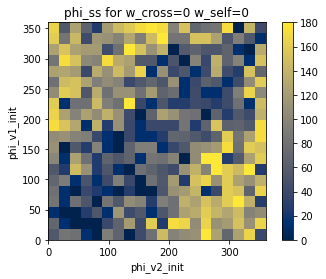

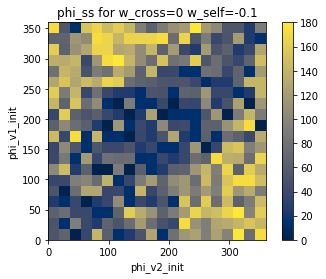

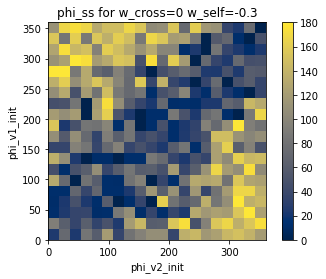

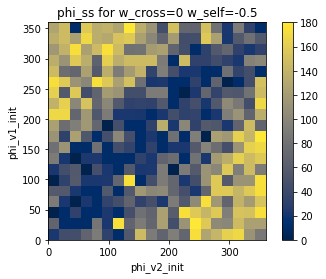

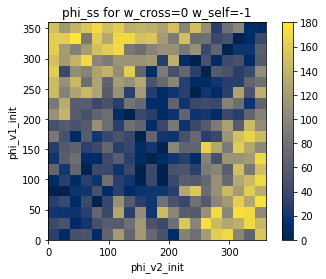

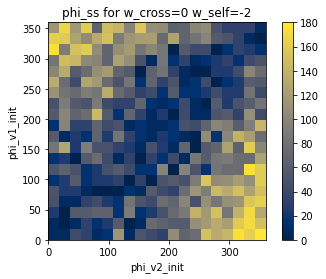

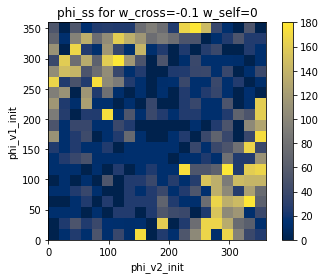

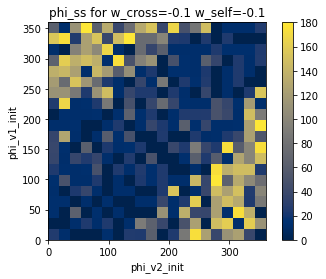

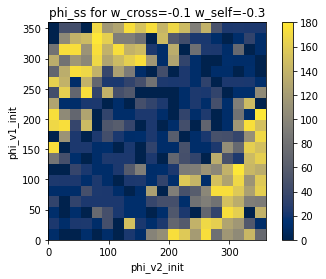

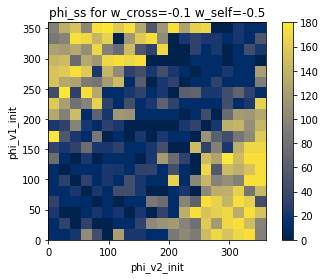

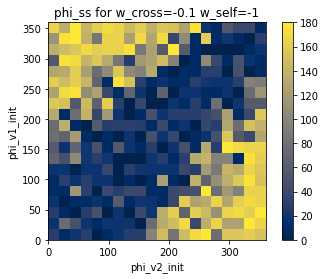

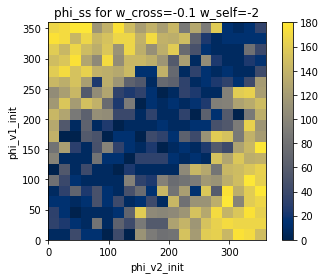

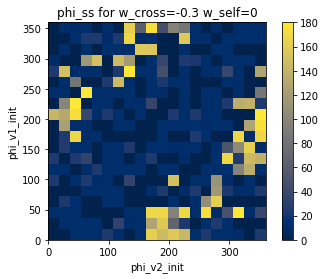

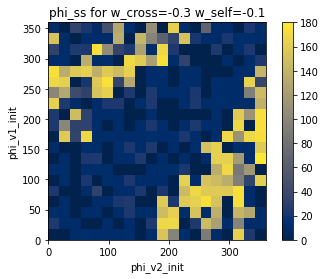

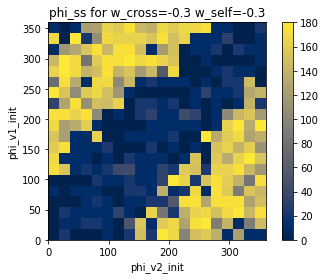

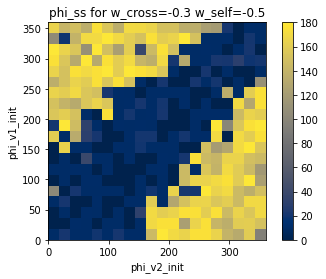

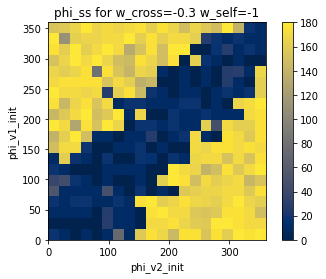

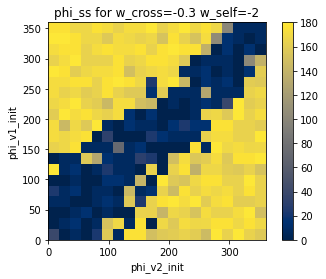

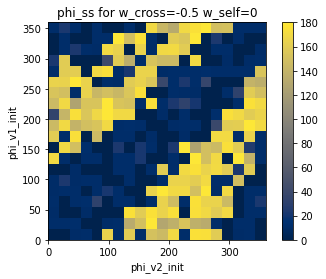

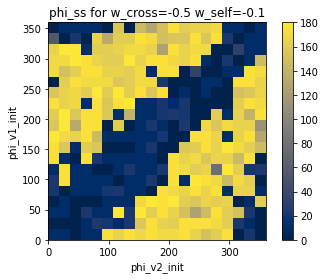

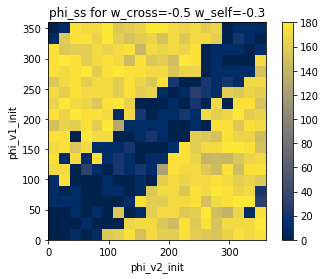

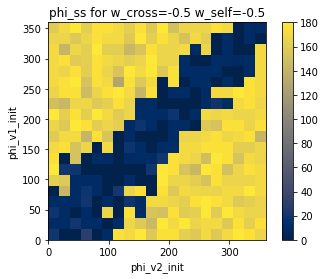

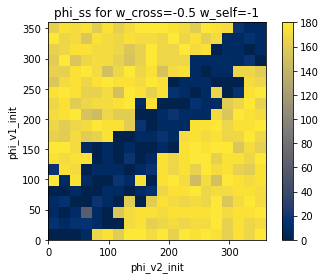

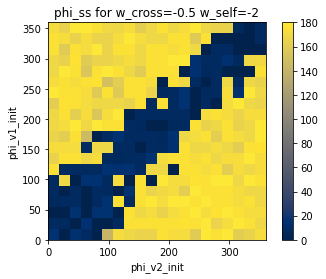

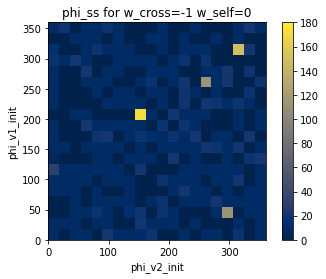

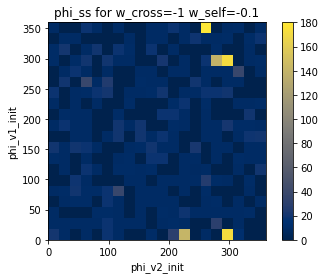

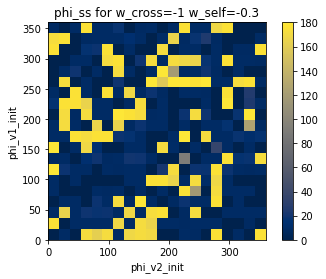

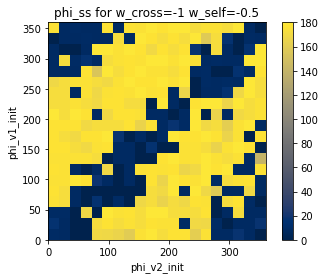

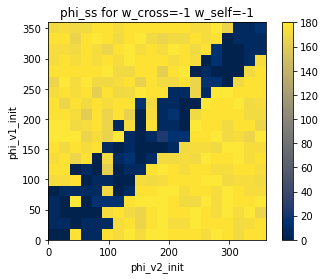

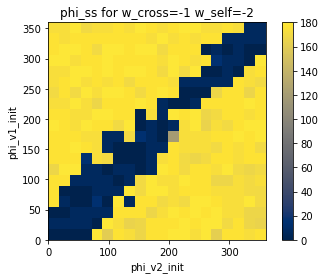

/content/functions_sim.py:65: UserWarning: Warning: Some neurons don't spike: phase difference used =-100
  warnings.warn("Warning: Some neurons don't spike: phase difference used =-100")


IndexError: ignored

In [ ]:
for i in range(len(w_all)):
  for j in range(len(w_all)):
    n_v = 20
    v_values = np.linspace(0, 1, n_v)
    w_cross = w_all[i]
    w_self = w_all[j]
    i_ext_mag = 1.5
    plt_ttl = "phi_ss for w_cross="+ str(w_cross) +" w_self="+ str(w_self)
    phi_all = v_init_sweep_noisy(v_values, w_cross, w_self, i_ext_mag, h_syn, noise_var=0.1, n_steps=500)
    plot_phase(phi_all, [0, 360, 0, 360], 'phi_v2_init', 'phi_v1_init', plt_ttl)


/content/functions_sim.py:59: UserWarning: Time period of oscillation of 1,2 differs by more than 2ms
  warnings.warn("Time period of oscillation of 1,2 differs by more than 2ms")


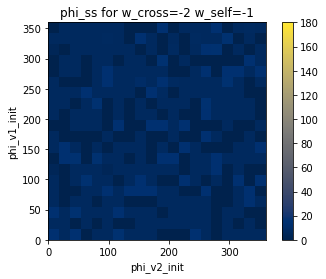

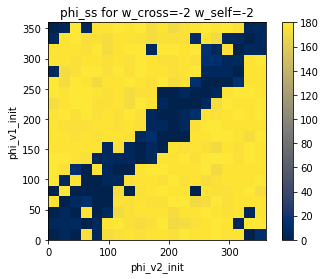

In [ ]:
for i in range(len(w_all)):
  for j in range(len(w_all)):
    if w_all[i]==-2 and w_all[j]<-0.5:
      n_v = 20
      v_values = np.linspace(0, 1, n_v)
      w_cross = w_all[i]
      w_self = w_all[j]
      i_ext_mag = 1.5
      plt_ttl = "phi_ss for w_cross="+ str(w_cross) +" w_self="+ str(w_self)
      phi_all = v_init_sweep_noisy(v_values, w_cross, w_self, i_ext_mag, h_syn, noise_var=0.1, n_steps=500)
      plot_phase(phi_all, [0, 360, 0, 360], 'phi_v2_init', 'phi_v1_init', plt_ttl)


Increase noise variance to 0.2, observe effect

/content/functions_sim.py:59: UserWarning: Time period of oscillation of 1,2 differs by more than 2ms
  warnings.warn("Time period of oscillation of 1,2 differs by more than 2ms")


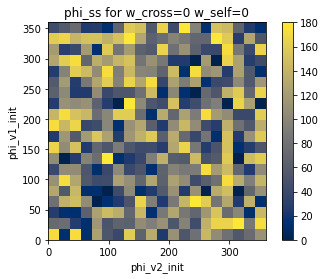

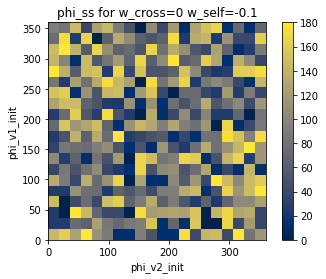

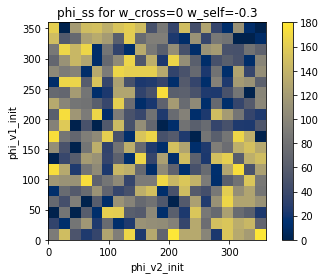

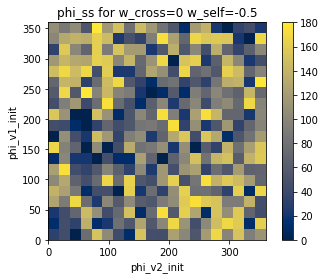

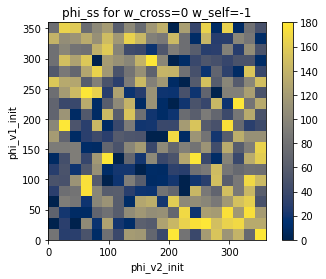

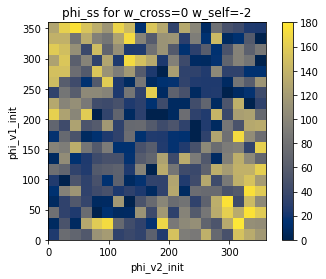

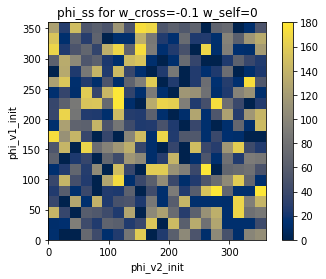

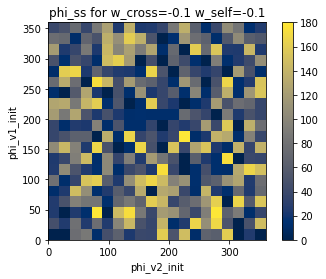

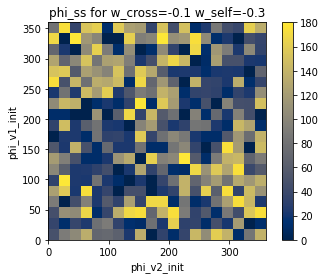

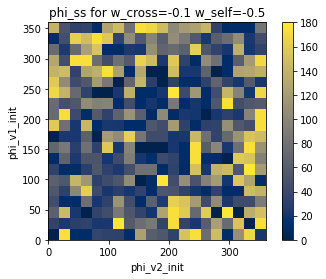

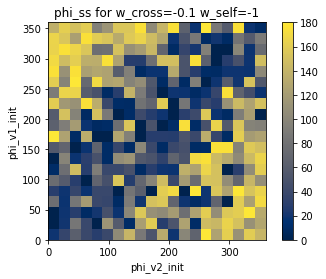

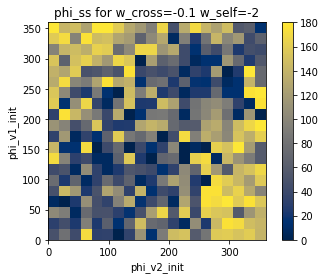

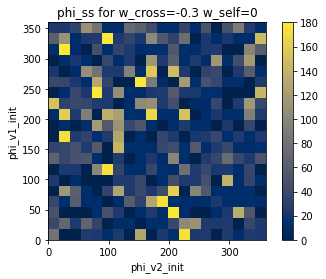

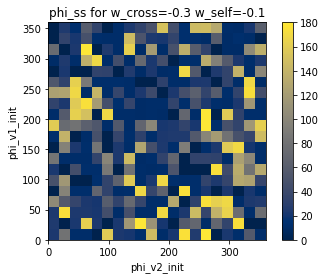

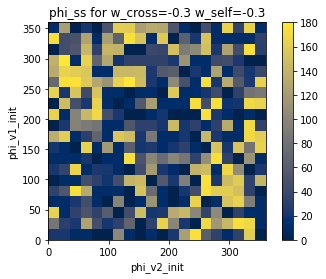

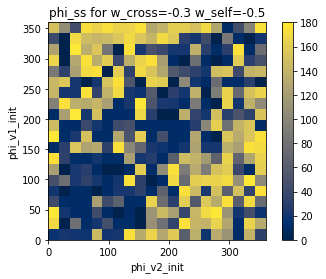

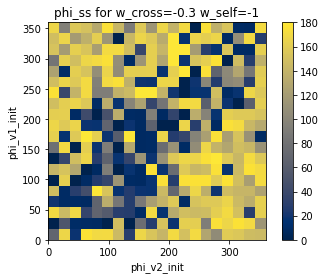

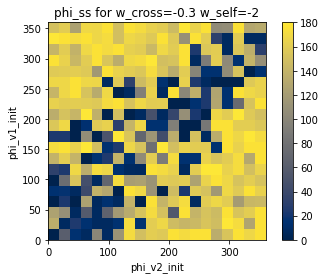

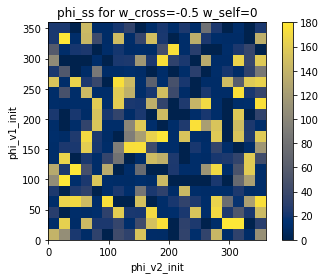

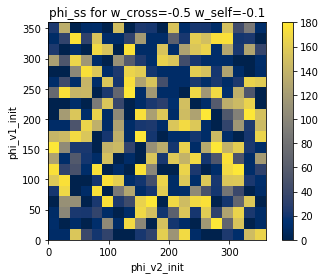

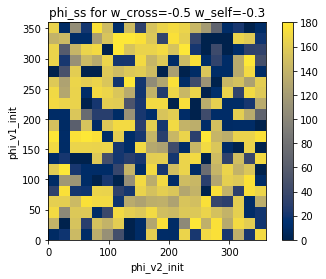

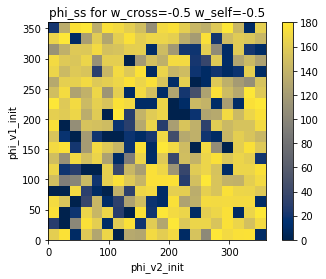

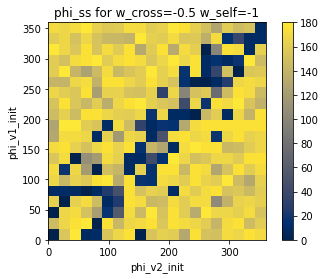

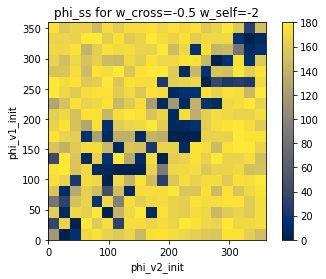

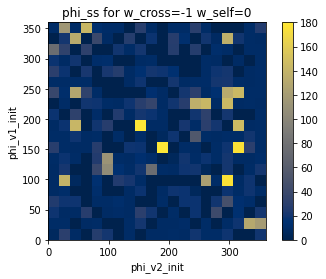

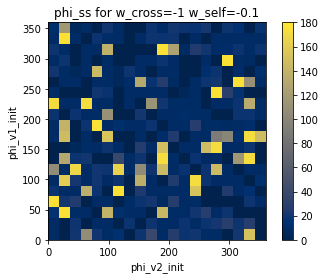

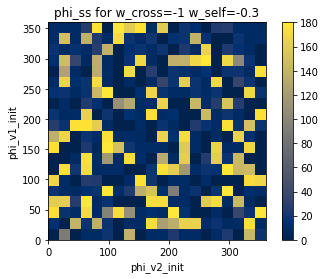

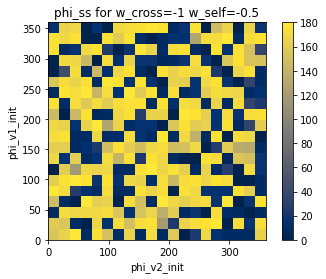

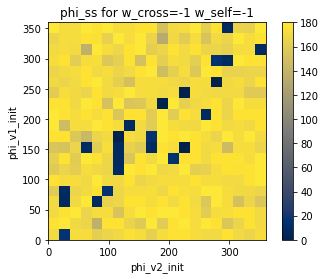

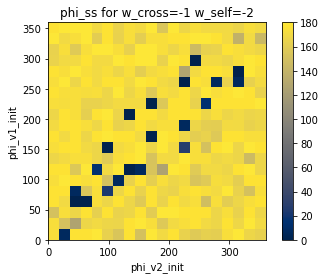

/content/functions_sim.py:65: UserWarning: Warning: Some neurons don't spike: phase difference used =-100
  warnings.warn("Warning: Some neurons don't spike: phase difference used =-100")


IndexError: ignored

In [ ]:
for i in range(len(w_all)):
  for j in range(len(w_all)):
    n_v = 20
    v_values = np.linspace(0, 1, n_v)
    w_cross = w_all[i]
    w_self = w_all[j]
    i_ext_mag = 1.5
    plt_ttl = "phi_ss for w_cross="+ str(w_cross) +" w_self="+ str(w_self)
    phi_all = v_init_sweep_noisy(v_values, w_cross, w_self, i_ext_mag, h_syn, noise_var=0.2, n_steps=500)
    plot_phase(phi_all, [0, 360, 0, 360], 'phi_v2_init', 'phi_v1_init', plt_ttl)


/content/functions_sim.py:59: UserWarning: Time period of oscillation of 1,2 differs by more than 2ms
  warnings.warn("Time period of oscillation of 1,2 differs by more than 2ms")


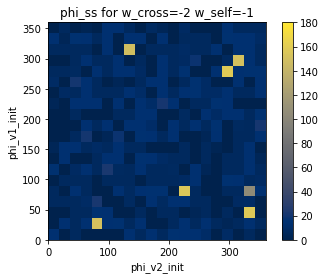

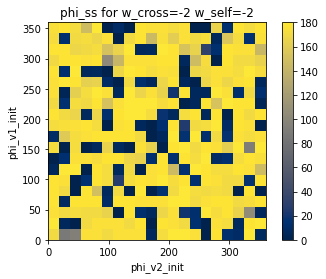

In [ ]:
for i in range(len(w_all)):
  for j in range(len(w_all)):
    if w_all[i]==-2 and w_all[j]<-0.5:
      n_v = 20
      v_values = np.linspace(0, 1, n_v)
      w_cross = w_all[i]
      w_self = w_all[j]
      i_ext_mag = 1.5
      plt_ttl = "phi_ss for w_cross="+ str(w_cross) +" w_self="+ str(w_self)
      phi_all = v_init_sweep_noisy(v_values, w_cross, w_self, i_ext_mag, h_syn, noise_var=0.2, n_steps=500)
      plot_phase(phi_all, [0, 360, 0, 360], 'phi_v2_init', 'phi_v1_init', plt_ttl)


Hence, using standard deviation of 0.2 in input current of value 1.5, one can achieve complementary spiking nearly-independent of initial voltages of the two neurons

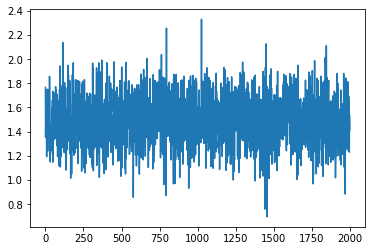

In [ ]:

out = run_simulation_noisy(w_cross=-0.6, w_self=-0.5, i_ext_mag=1.5, synaptic_waveform=h_syn, num_steps=N,noise_var=0.2, v_initial=np.array([0, 0.3]).reshape((2,1)))

v, s, i_ext = out['voltage'], out['spike'], out['external_current'] 
plt.plot(i_ext[0,:])


In [ ]:
i_ext_mag

1.5

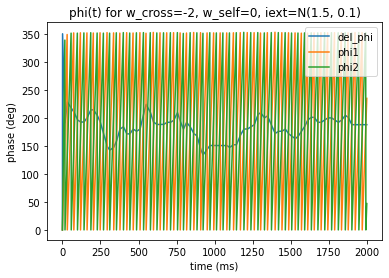

In [ ]:
dph, ph1, ph2 = get_phase_t(s[:,0], s[:,1])
plt.plot(dph)
plt.plot(ph1)
plt.plot(ph2)
plt.legend(["del_phi", "phi1", "phi2"])
plt.xlabel("time (ms)")
plt.ylabel("phase (deg)")
plt.title("phi(t) for w_cross="+str(w_cross)+", w_self="+str(w_self)+", iext=N(1.5, 0.1)")
plt.show()

# Observe the dependence of settling phase on connection strengths for a fixed phase difference

In [ ]:
def w_sweep_noisy(w_values, v_init, i_ext_mag,noise_var, synaptic_waveform):
  n_w = len(w_values) # 10 different weight values
  n_neurons=2
  # w_values = -np.linspace(0, 5, n_w) 
  phi_all = np.zeros((n_w, n_w))
  n_steps = 500
  # v_0 = np.array([0.1, 0.2]).reshape((2, 1))
  for a in range(n_w):
    for b in range(n_w):
      if w_values[a]>-1 or w_values[b]<=w_values[a]/2:
        w_c = w_values[a]
        w_s = w_values[b]
        # print(f"w_cross={w_c}, w_self={w_s}, v_init={v_0}")  
        outputs = run_simulation_noisy(w_cross=w_c, w_self=w_s, i_ext_mag=i_ext_mag, synaptic_waveform=synaptic_waveform,noise_var=noise_var, num_steps=n_steps, num_neurons=n_neurons,v_initial=v_init)
        v,s  = outputs['voltage'], outputs['spike']
        phi = settling_phase(s[:,0], s[:,1])
        phi_all[b,a] = phi
  return phi_all

In [ ]:
w_values = -1*np.linspace(0,2, num=20)
v_init = np.array([0,0.3]).reshape((2,1))


In [ ]:
i_ext_mag

1.5

/content/functions_sim.py:59: UserWarning: Time period of oscillation of 1,2 differs by more than 2ms
  warnings.warn("Time period of oscillation of 1,2 differs by more than 2ms")


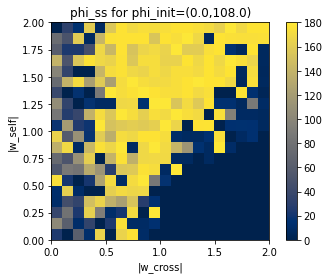

In [ ]:
phi = w_sweep_noisy(w_values=w_values,v_init=v_init,i_ext_mag=i_ext_mag,noise_var=0.2, synaptic_waveform=h_syn)
plot_phase(phi, [0, max(np.abs(w_values)), 0, max(np.abs(w_values))], '|w_cross|','|w_self|',"phi_ss for phi_init=("+str(360*v_init[0,0])+","+str(360*v_init[1,0])+")")

In [ ]:
def w_sweep(w_values, v_init, i_ext_mag, synaptic_waveform):
  n_w = len(w_values) # 10 different weight values
  n_neurons=2
  # w_values = -np.linspace(0, 5, n_w) 
  phi_all = np.zeros((n_w, n_w))
  n_steps = 500
  # v_0 = np.array([0.1, 0.2]).reshape((2, 1))
  for a in range(n_w):
    for b in range(n_w):
      w_c = w_values[a]
      w_s = w_values[b]
      # print(f"w_cross={w_c}, w_self={w_s}, v_init={v_0}")  
      outputs = run_simulation(w_c, w_s, i_ext_mag, synaptic_waveform, n_steps, n_neurons,v_init)
      v,s  = outputs['voltage'], outputs['spike']
      phi = settling_phase(s[:,0], s[:,1])
      phi_all[b,a] = phi
  return phi_all

/content/functions_sim.py:65: UserWarning: Warning: Some neurons don't spike: phase difference used =-100
  warnings.warn("Warning: Some neurons don't spike: phase difference used =-100")


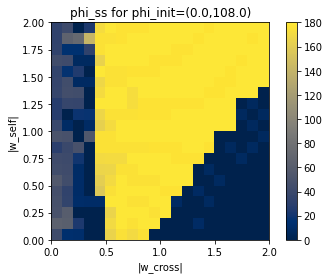

In [ ]:
phi2 = w_sweep(w_values=w_values,v_init=v_init,i_ext_mag=i_ext_mag,synaptic_waveform=h_syn)
plot_phase(phi2, [0, max(np.abs(w_values)), 0, max(np.abs(w_values))], '|w_cross|','|w_self|',"phi_ss for phi_init=("+str(360*v_init[0,0])+","+str(360*v_init[1,0])+")")

Does the above work for 0 initial phase too?

/content/functions_sim.py:59: UserWarning: Time period of oscillation of 1,2 differs by more than 2ms
  warnings.warn("Time period of oscillation of 1,2 differs by more than 2ms")


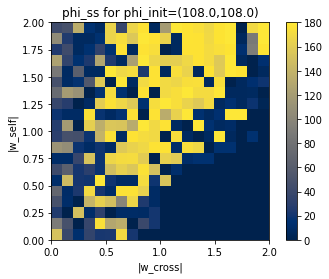

In [ ]:
i_ext_mag = 1.5
w_values = -1*np.linspace(0,2, num=20)
v_init = np.array([0.3,0.3]).reshape((2,1))
phi = w_sweep_noisy(w_values=w_values,v_init=v_init,i_ext_mag=i_ext_mag,noise_var=0.2, synaptic_waveform=h_syn)
plot_phase(phi, [0, max(np.abs(w_values)), 0, max(np.abs(w_values))], '|w_cross|','|w_self|',"phi_ss for phi_init=("+str(360*v_init[0,0])+","+str(360*v_init[1,0])+")")

# Role of Excitatory Connections

In [ ]:
N = 200
noise_var = 0
v_init=np.array([0, 0.3]).reshape((2,1))
i_ext_mean = 1.5

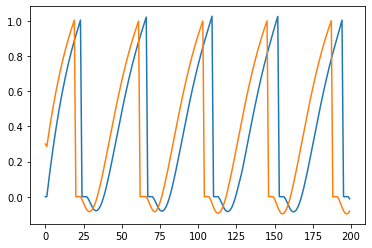

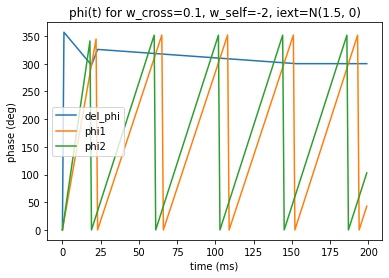

In [ ]:
w_cross = 0.1
w_self = -2
out = run_simulation_noisy(w_cross=w_cross, w_self=w_self, i_ext_mag=i_ext_mean, synaptic_waveform=h_syn, num_steps=N,noise_var=noise_var, v_initial=v_init)

v, s, i_ext = out['voltage'], out['spike'], out['external_current'] 
plt.plot(v[:,0])
plt.plot(v[:,1])
plt.show()

plot_phi_t(s, w_cross, w_self, noise_var)

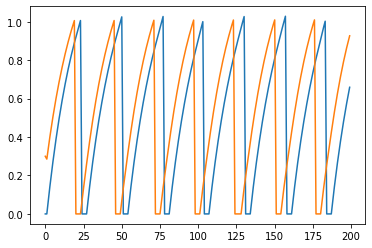

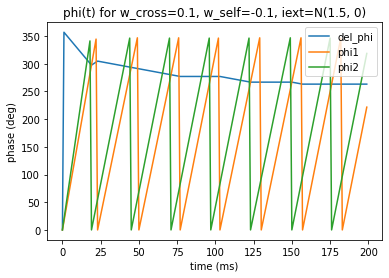

In [ ]:
w_cross = 0.1
w_self = -0.1
out = run_simulation_noisy(w_cross=w_cross, w_self=w_self, i_ext_mag=i_ext_mean, synaptic_waveform=h_syn, num_steps=N,noise_var=noise_var, v_initial=v_init)

v, s, i_ext = out['voltage'], out['spike'], out['external_current'] 
plt.plot(v[:,0])
plt.plot(v[:,1])
plt.show()

plot_phi_t(s, w_cross, w_self, noise_var)

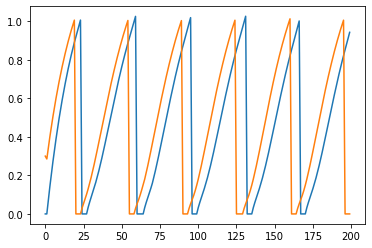

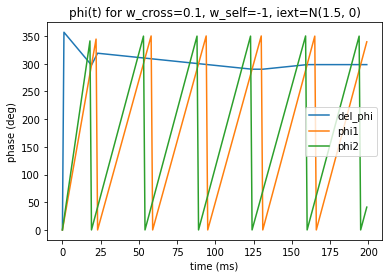

In [ ]:
w_cross = 0.1
w_self = -1
out = run_simulation_noisy(w_cross=w_cross, w_self=w_self, i_ext_mag=i_ext_mean, synaptic_waveform=h_syn, num_steps=N,noise_var=noise_var, v_initial=v_init)

v, s, i_ext = out['voltage'], out['spike'], out['external_current'] 
plt.plot(v[:,0])
plt.plot(v[:,1])
plt.show()

plot_phi_t(s, w_cross, w_self, noise_var)

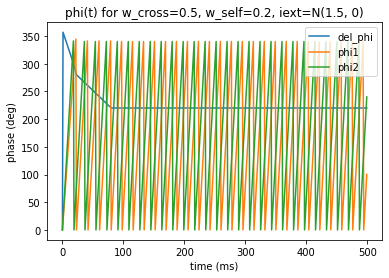

In [ ]:
dph, ph1, ph2 = get_phase_t(s[:,0], s[:,1])
plt.plot(dph)
plt.plot(ph1)
plt.plot(ph2)
plt.legend(["del_phi", "phi1", "phi2"])
plt.xlabel("time (ms)")
plt.ylabel("phase (deg)")
plt.title("phi(t) for w_cross="+str(w_cross)+", w_self="+str(w_self)+", iext=N(1.5, "+str(noise_var)+")")
plt.show()

In [ ]:
def plot_phi_t(s, w_cross, w_self, noise_var):
  dph, ph1, ph2 = get_phase_t(s[:,0], s[:,1])
  plt.plot(dph)
  plt.plot(ph1)
  plt.plot(ph2)
  plt.legend(["del_phi", "phi1", "phi2"])
  plt.xlabel("time (ms)")
  plt.ylabel("phase (deg)")
  plt.title("phi(t) for w_cross="+str(w_cross)+", w_self="+str(w_self)+", iext=N(1.5, "+str(noise_var)+")")
  plt.show()

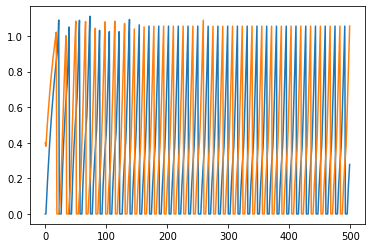

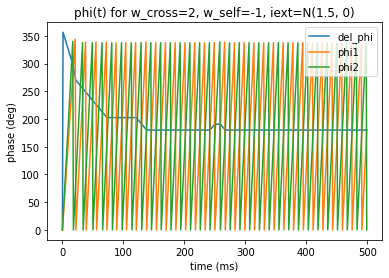

In [ ]:
N = 500
noise_var = 0
v_init=np.array([0, 0.4]).reshape((2,1))
i_ext_mean = 1.5
w_cross = 2
w_self = -1
out = run_simulation(w_cross=w_cross, w_self=w_self, i_ext_mag=i_ext_mean, synaptic_waveform=h_syn, num_steps=N, v_initial=v_init)

v, s, i_ext = out['voltage'], out['spike'], out['external_current'] 
plt.plot(v[:,0])
plt.plot(v[:,1])
plt.show()

plot_phi_t(s, w_cross, w_self, noise_var)

In [ ]:
w_all=[-2,-1.5,-1,-0.5, 0.5, 1,1.5, 2]

self inhibitory, cross excitatory

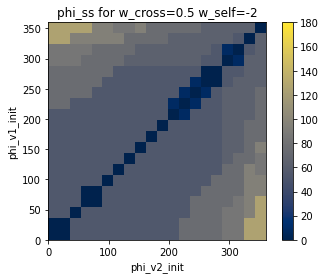

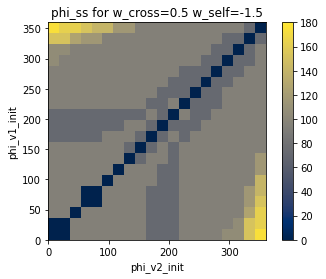

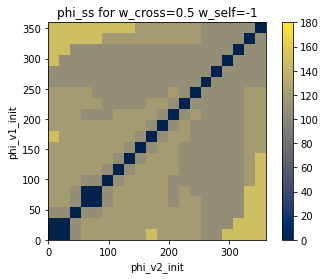

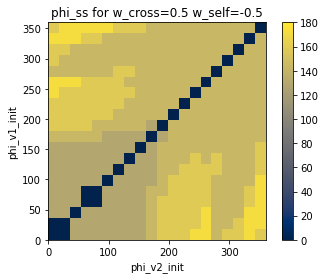

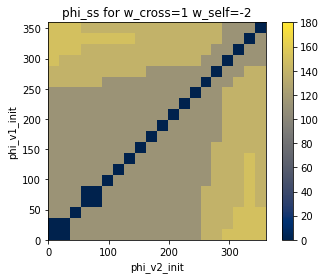

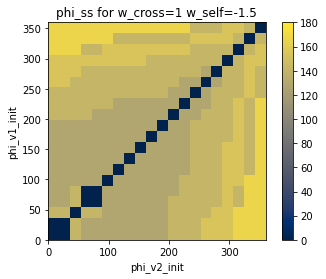

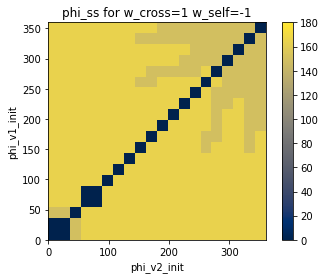

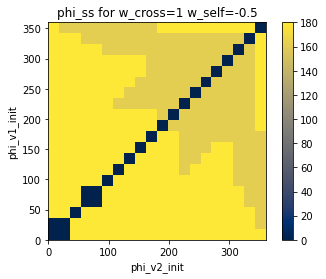

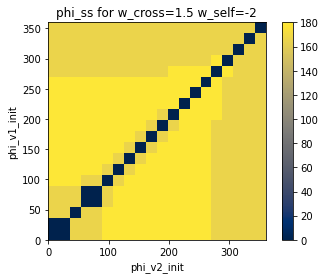

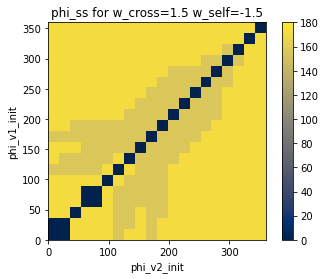

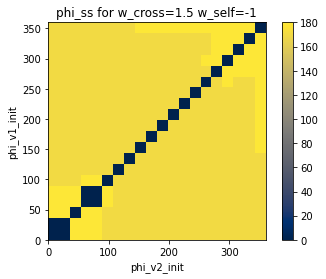

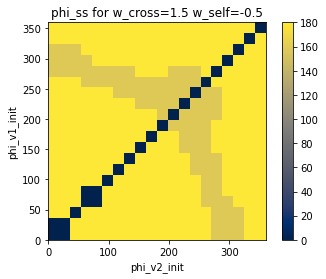

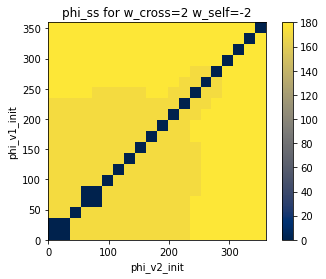

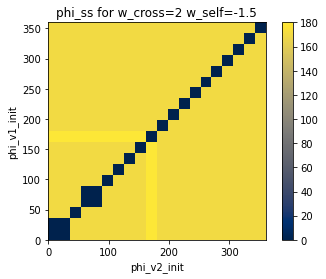

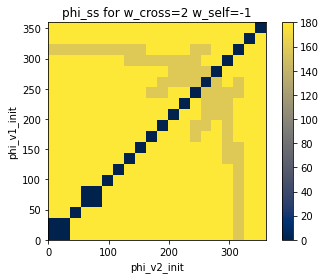

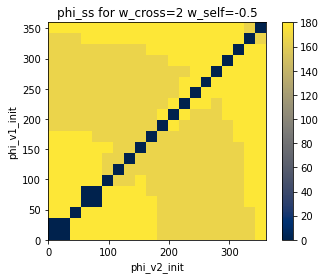

In [ ]:
for i in range(len(w_all)):
  for j in range(len(w_all)):
    if w_all[j]<0 and w_all[i]>0:
      n_v = 20
      v_values = np.linspace(0, 1, n_v)
      w_cross = w_all[i]
      w_self = w_all[j]
      i_ext_mag = 1.5
      plt_ttl = "phi_ss for w_cross="+ str(w_cross) +" w_self="+ str(w_self)
      phi_all = v_init_sweep(v_values, w_cross, w_self, i_ext_mag, h_syn)
      plot_phase(phi_all, [0, 360, 0, 360], 'phi_v2_init', 'phi_v1_init', plt_ttl)


self and cross excitatory

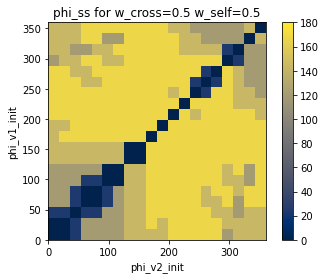

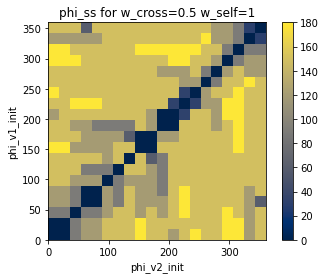

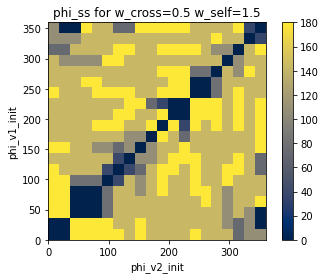

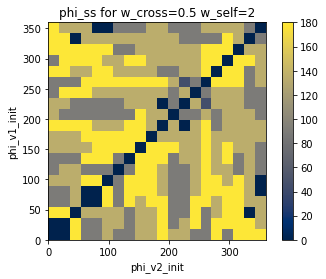

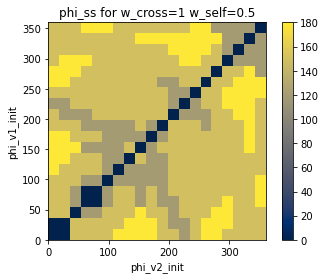

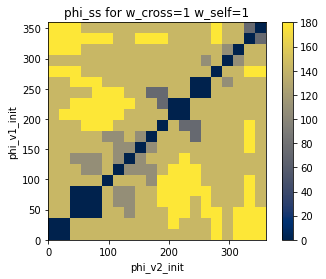

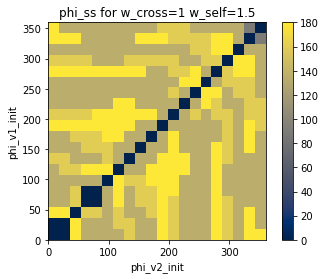

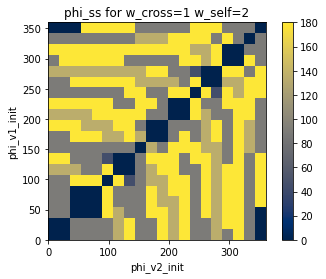

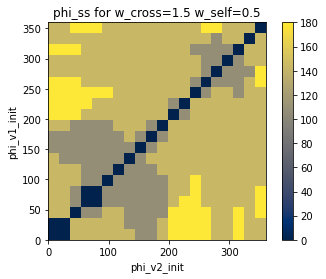

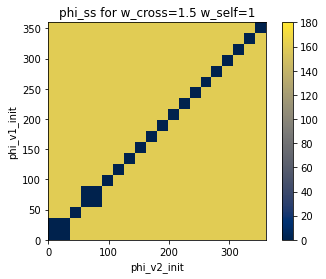

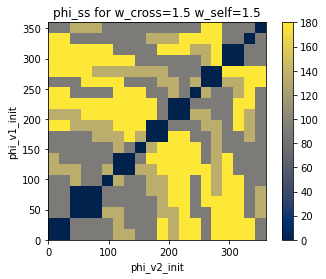

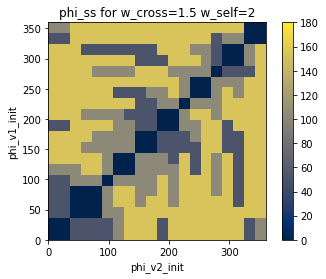

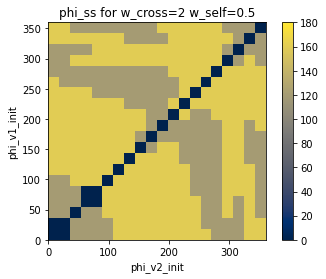

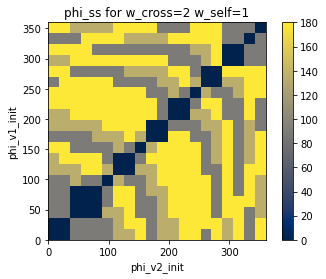

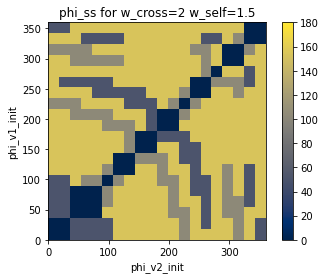

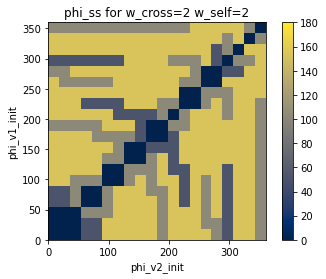

In [ ]:
for i in range(len(w_all)):
  for j in range(len(w_all)):
    if w_all[j]>0 and w_all[i]>0:
      n_v = 20
      v_values = np.linspace(0, 1, n_v)
      w_cross = w_all[i]
      w_self = w_all[j]
      i_ext_mag = 1.5
      plt_ttl = "phi_ss for w_cross="+ str(w_cross) +" w_self="+ str(w_self)
      phi_all = v_init_sweep(v_values, w_cross, w_self, i_ext_mag, h_syn)
      plot_phase(phi_all, [0, 360, 0, 360], 'phi_v2_init', 'phi_v1_init', plt_ttl)


Excitatory connections with noise

/content/functions_sim.py:59: UserWarning: Time period of oscillation of 1,2 differs by more than 2ms
  warnings.warn("Time period of oscillation of 1,2 differs by more than 2ms")


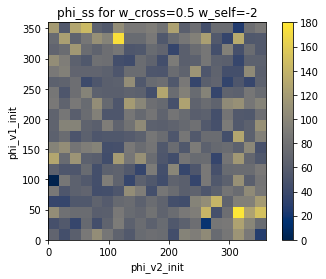

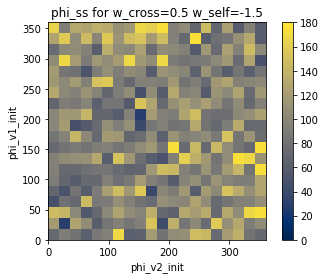

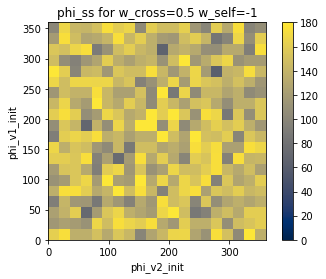

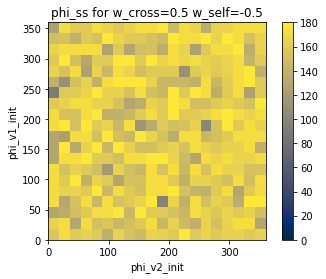

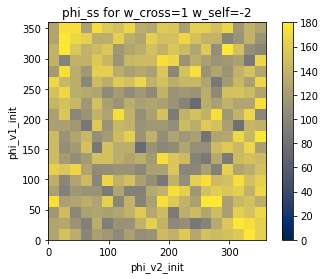

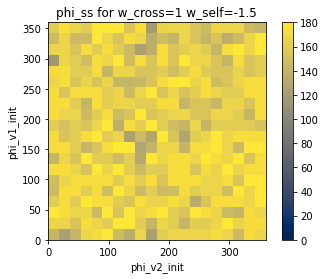

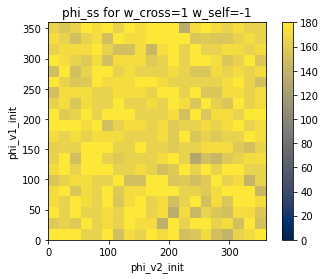

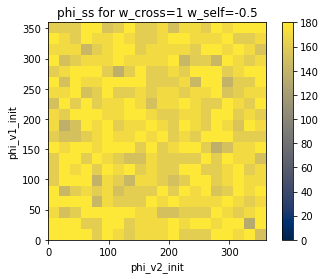

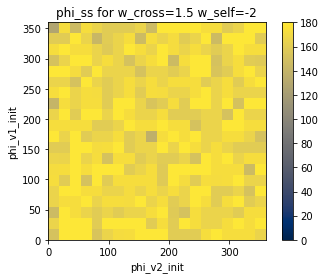

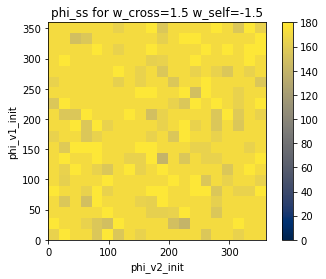

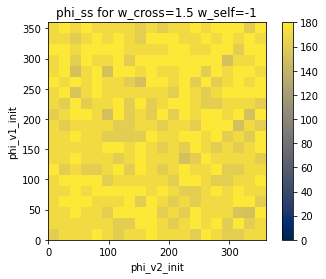

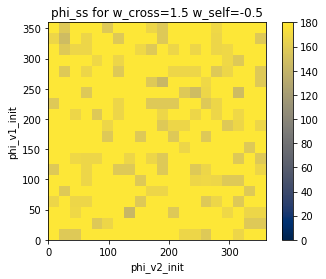

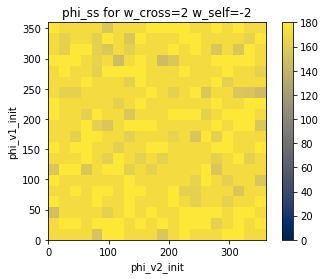

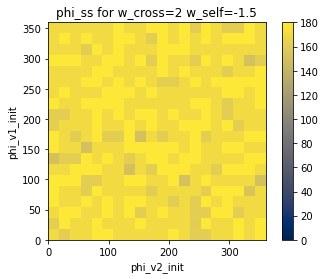

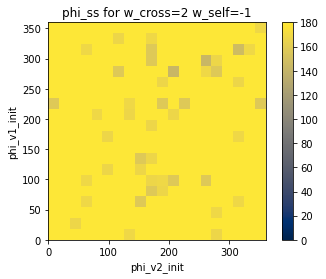

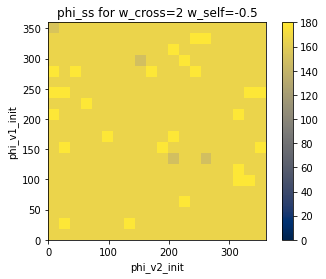

In [ ]:
for i in range(len(w_all)):
  for j in range(len(w_all)):
    if w_all[j]<0 and w_all[i]>0:
      n_v = 20
      v_values = np.linspace(0, 1, n_v)
      w_cross = w_all[i]
      w_self = w_all[j]
      i_ext_mag = 1.5
      plt_ttl = "phi_ss for w_cross="+ str(w_cross) +" w_self="+ str(w_self)
      phi_all = v_init_sweep_noisy(v_values, w_cross, w_self, i_ext_mag, h_syn, noise_var=0.2, n_steps=500)
      plot_phase(phi_all, [0, 360, 0, 360], 'phi_v2_init', 'phi_v1_init', plt_ttl)


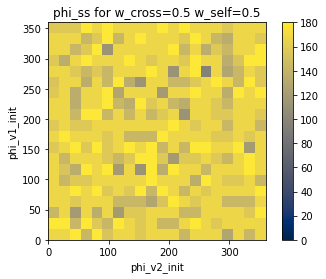

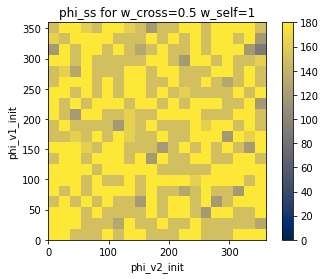

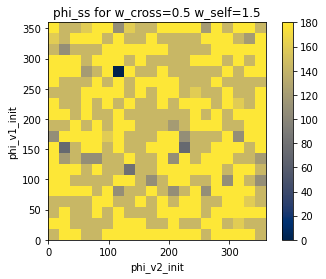

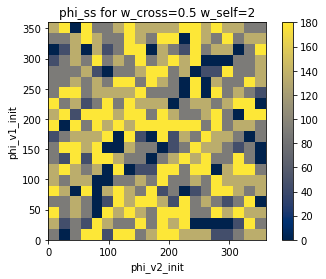

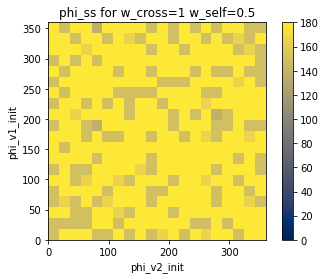

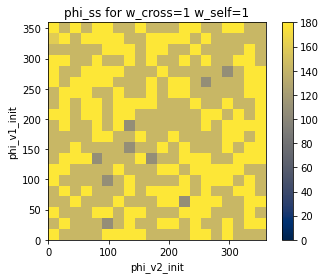

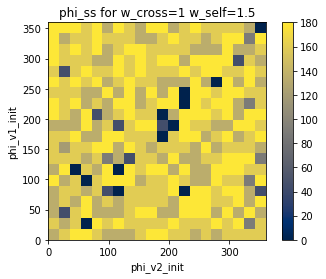

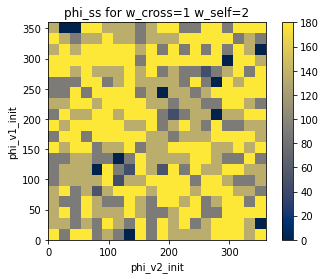

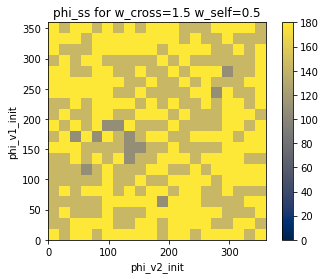

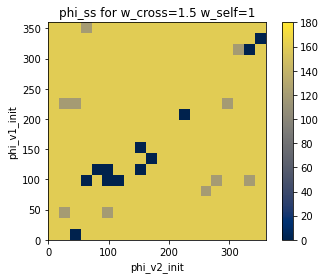

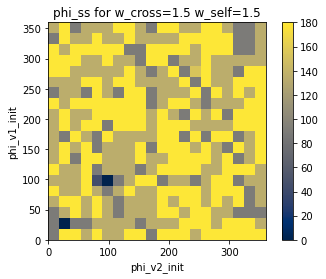

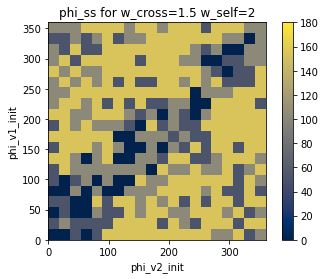

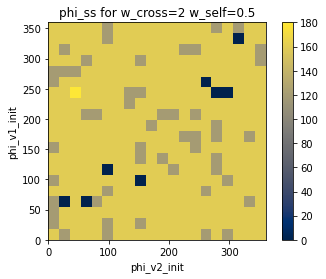

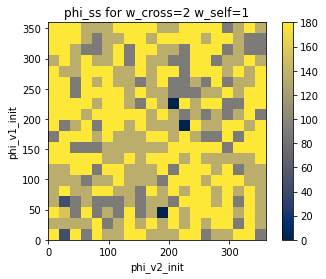

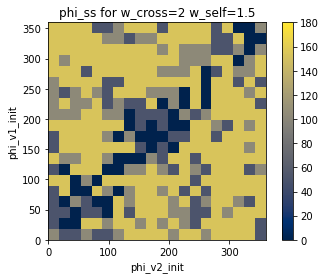

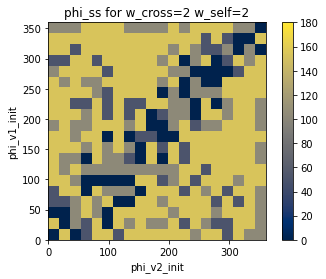

In [ ]:
for i in range(len(w_all)):
  for j in range(len(w_all)):
    if w_all[j]>0 and w_all[i]>0:
      n_v = 20
      v_values = np.linspace(0, 1, n_v)
      w_cross = w_all[i]
      w_self = w_all[j]
      i_ext_mag = 1.5
      plt_ttl = "phi_ss for w_cross="+ str(w_cross) +" w_self="+ str(w_self)
      phi_all = v_init_sweep_noisy(v_values, w_cross, w_self, i_ext_mag, h_syn, noise_var=0.2, n_steps=500)
      plot_phase(phi_all, [0, 360, 0, 360], 'phi_v2_init', 'phi_v1_init', plt_ttl)


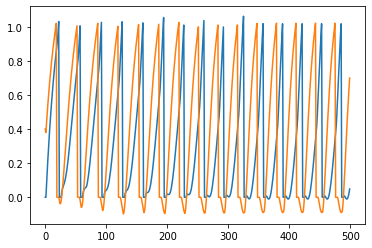

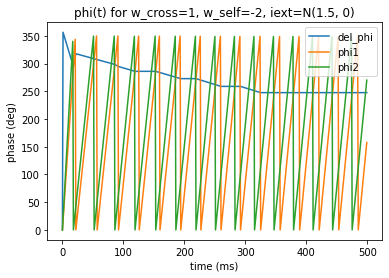

In [ ]:
N = 500
noise_var = 0
v_init=np.array([0, 0.4]).reshape((2,1))
i_ext_mean = 1.5
w_cross = 1
w_self = -2
out = run_simulation(w_cross=w_cross, w_self=w_self, i_ext_mag=i_ext_mean, synaptic_waveform=h_syn, num_steps=N, v_initial=v_init)

v, s, i_ext = out['voltage'], out['spike'], out['external_current'] 
plt.plot(v[:,0])
plt.plot(v[:,1])
plt.show()

plot_phi_t(s, w_cross, w_self, noise_var)

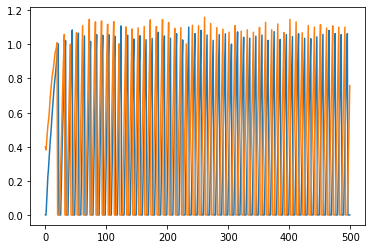

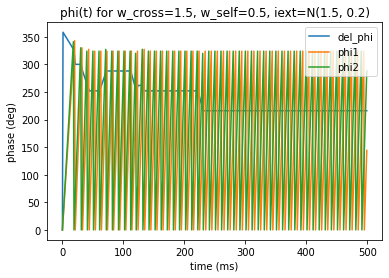

In [ ]:
N = 500
noise_var = 0.2
v_init=np.array([0, 0.4]).reshape((2,1))
i_ext_mean = 1.5
w_cross = 1.5
w_self = 0.5
out = run_simulation_noisy(w_cross=w_cross, w_self=w_self, i_ext_mag=i_ext_mean, synaptic_waveform=h_syn, num_steps=N, noise_var = noise_var, v_initial=v_init)

v, s, i_ext = out['voltage'], out['spike'], out['external_current'] 
plt.plot(v[:50,0])
plt.plot(v[:,1])
plt.show()

plot_phi_t(s, w_cross, w_self, noise_var)